### Unsupervised Learning: Principal Component Analysis
#### PCA: Visualize and classify MNIST handwritten images

- Dataset: hand written dataset (mnist_28x28_5000rows.csv.zip)
- Learning Date: 4-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

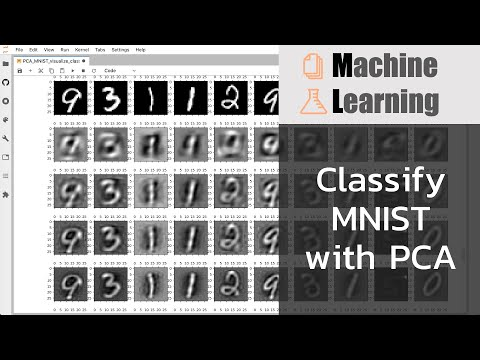

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('QIB6G0pkwmI', width = 720, height = 405)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.Timestamp.now()

Timestamp('2023-09-04 22:16:42.532528')

In [6]:
# read csv.zip data into a dataframe

data_file = 'https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


In [7]:
df = pd.read_csv(data_file)
df.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df.shape

(5000, 785)

In [8]:
28*28

784

In [10]:
print(df.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [12]:
D = df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

In [14]:
D.shape[1]/28

28.0

n = 2446
target = 2


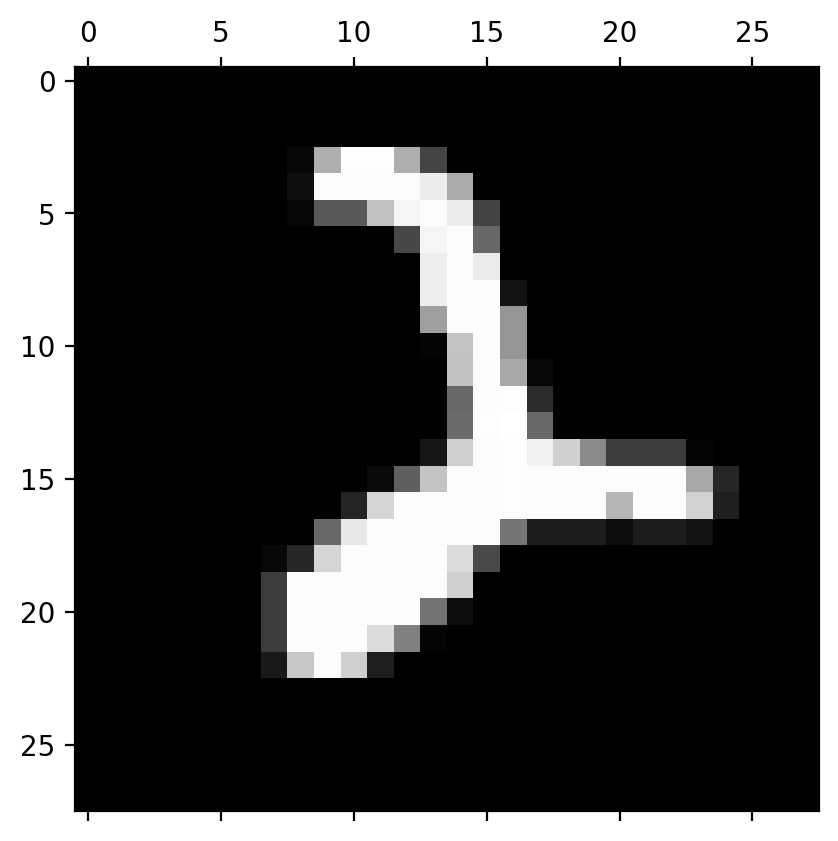

In [15]:
n = np.random.randint(0, D.shape[0])
print(f'n = {n}')
print(f"target = {df['class'].iloc[n]}")
plt.matshow(D[n].reshape(28, 28), cmap='gray')

In [16]:
df['class'].to_numpy()[:10] # target/label

array([3, 3, 1, 1, 3, 9, 1, 4, 2, 4])

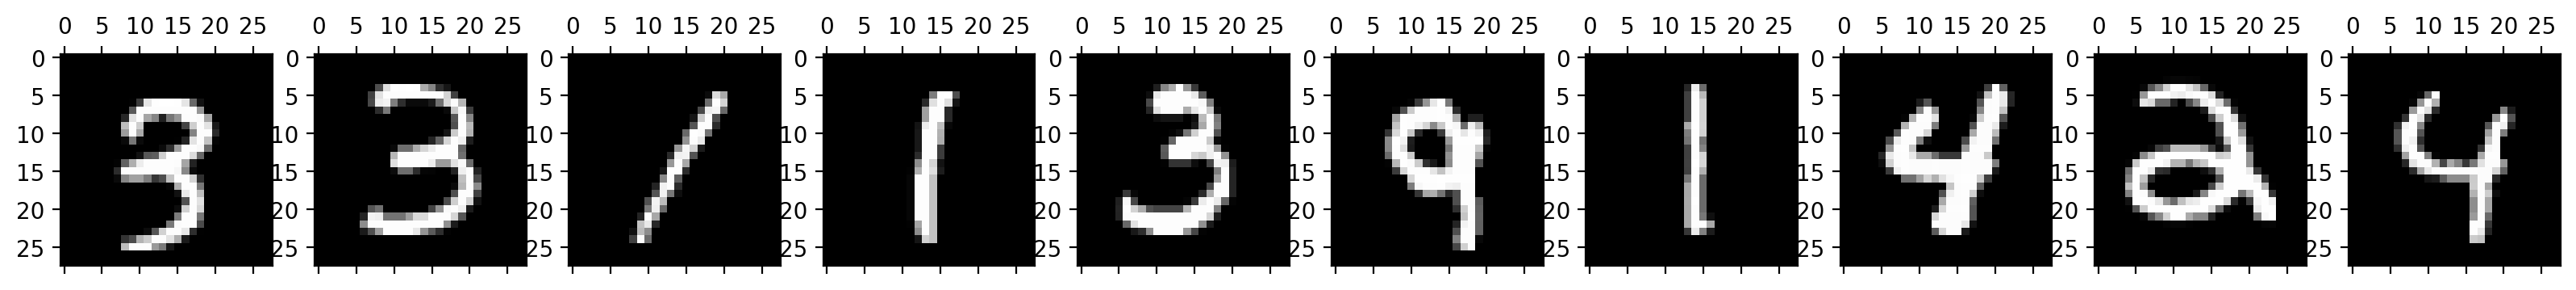

In [17]:
n = 10

fig, ax = plt.subplots(1, n, figsize = (20, 4))

[ax[i].matshow(D[i].reshape(28, -1), cmap='gray') for i in range(n)];

### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# get X and y

X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

In [20]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.shape

(5000, 784)

In [22]:
y.head()

0    3
1    3
2    1
3    1
4    3
Name: class, dtype: int64

In [23]:
y.shape

(5000,)

In [24]:
test_size = .2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 7, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

In [25]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train['pixel780']

2938    0
1408    0
1556    0
4297    0
4748    0
       ..
2054    0
1135    0
4173    0
3425    0
3355    0
Name: pixel780, Length: 4000, dtype: int64

### Principal Component Analysis (PCA)

In [27]:
# import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Standardized data (mean = 0, s = 1)

In [28]:
scaler = StandardScaler() # fit/tr5ain on training set only
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_t = scaler.transform(X_train)
X_train_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_test_t = scaler.transform(X_test)
X_test_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### StandardScaler (z-score)

$$s = \frac{x_{i} - \bar{x}}{sd}$$

In [31]:
scaler.mean_[321:325]

array([74.8595 , 78.61175, 88.4155 , 97.8515 ])

In [32]:
scaler.var_[321:325]

array([10157.13075975, 10796.32851194, 11548.81535975, 11561.08844775])

In [33]:
X_train_t[:, 321].mean()

3.153033389935444e-17

In [34]:
X_train_t[:, 321].std()

1.0